# Data Visualization on House Price Data 

In [1]:
# Importing libraries for data frame and visualization...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from simple_colors import * #for print function

In [2]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Dimension of the data.
df.shape

(1460, 81)

In [4]:
# Data types of columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Categorical & Numerical Columns
print("Categorical Columns :",list(df.columns[df.dtypes=='object']))
print("\n")
print("Numerical Columns :",list(df.columns[df.dtypes!='object']))

Categorical Columns : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Numerical Columns : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 

# Dictionary
* MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

* MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
* LotFrontage: Linear feet of street connected to property

* LotArea: Lot size in square feet

* Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
* Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
* LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
* LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
* Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
* LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
* LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
* Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
* Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
* Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
* BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
* HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
* OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
* OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
* YearBuilt: Original construction date

* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

* RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
* RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
* Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
* Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
* MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
* MasVnrArea: Masonry veneer area in square feet

* ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
* ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
* Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
* BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
* BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
* BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
* BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
* BsmtFinSF1: Type 1 finished square feet

* BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

* BsmtFinSF2: Type 2 finished square feet

* BsmtUnfSF: Unfinished square feet of basement area

* TotalBsmtSF: Total square feet of basement area

* Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
* HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
* CentralAir: Central air conditioning

       N	No
       Y	Yes
		
* Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
* 1stFlrSF: First Floor square feet
 
* 2ndFlrSF: Second floor square feet

* LowQualFinSF: Low quality finished square feet (all floors)

* GrLivArea: Above grade (ground) living area square feet

* BsmtFullBath: Basement full bathrooms

* BsmtHalfBath: Basement half bathrooms

* FullBath: Full bathrooms above grade

* HalfBath: Half baths above grade

* Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

* Kitchen: Kitchens above grade

* KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

* Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
* Fireplaces: Number of fireplaces

* FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
* GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
* GarageYrBlt: Year garage was built
		
* GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
* GarageCars: Size of garage in car capacity

* GarageArea: Size of garage in square feet

* GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
* GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
* PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
* WoodDeckSF: Wood deck area in square feet

* OpenPorchSF: Open porch area in square feet

* EnclosedPorch: Enclosed porch area in square feet

* 3SsnPorch: Three season porch area in square feet

* ScreenPorch: Screen porch area in square feet

* PoolArea: Pool area in square feet

* PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
* Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	   No Fence
	
* MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA  	None
		
* MiscVal: $Value of miscellaneous feature

* MoSold: Month Sold (MM)

* YrSold: Year Sold (YYYY)

* SaleType: Type of sale
		
                WD 	Warranty Deed - Conventional
               CWD	Warranty Deed - Cash
               VWD	Warranty Deed - VA Loan
               New	Home just constructed and sold
               COD	Court Officer Deed/Estate
               Con	Contract 15% Down payment regular terms
             ConLw  Contract Low Down payment and low interest
             ConLI	Contract Low Interest
             ConLD	Contract Low Down
               Oth	Other

* SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, 
                             typically condo with garage unit.	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [6]:
# Dropping Id column...
df.drop(columns=['Id'],inplace=True)

In [7]:
# Change the data types 
print(df['MSSubClass'].dtypes)
df['MSSubClass']=df['MSSubClass'].astype(str)
print(df['MSSubClass'].dtypes)

int64
object


In [8]:
# Changing data type of multiple columns...
temp=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
        'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars']
for i in temp:
    df[i]=df[i].astype(str)
    print(df[i].dtypes)

object
object
object
object
object
object
object
object
object
object
object


### Univariate Graph

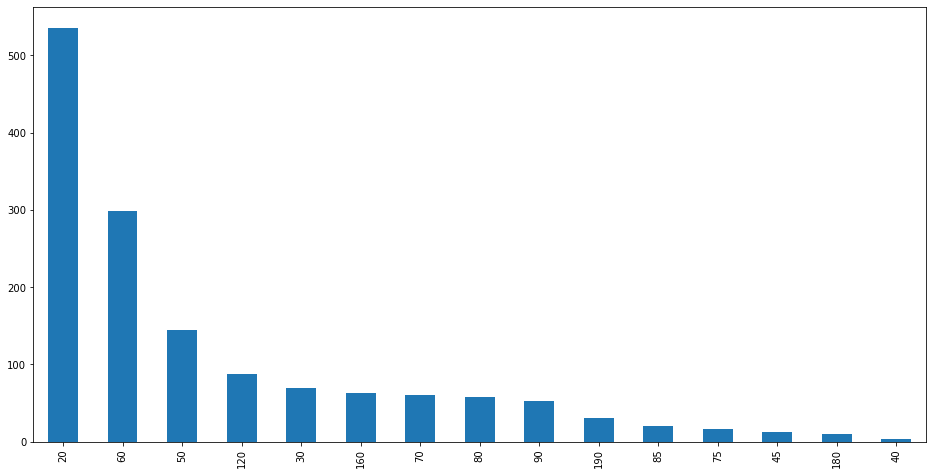

In [9]:
# Bar (pandas)
plt.figure(figsize=(16,8))
df['MSSubClass'].value_counts().plot(kind='bar')
plt.show()

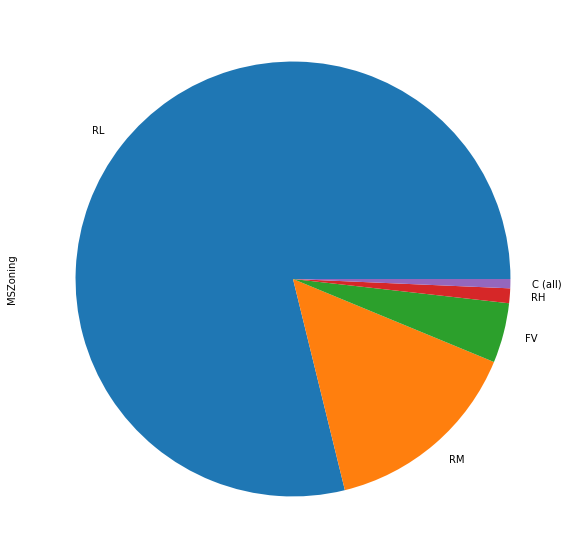

In [10]:
# Pie (pandas)
plt.figure(figsize=(20,10))
df['MSZoning'].value_counts().plot(kind='pie')
plt.show()


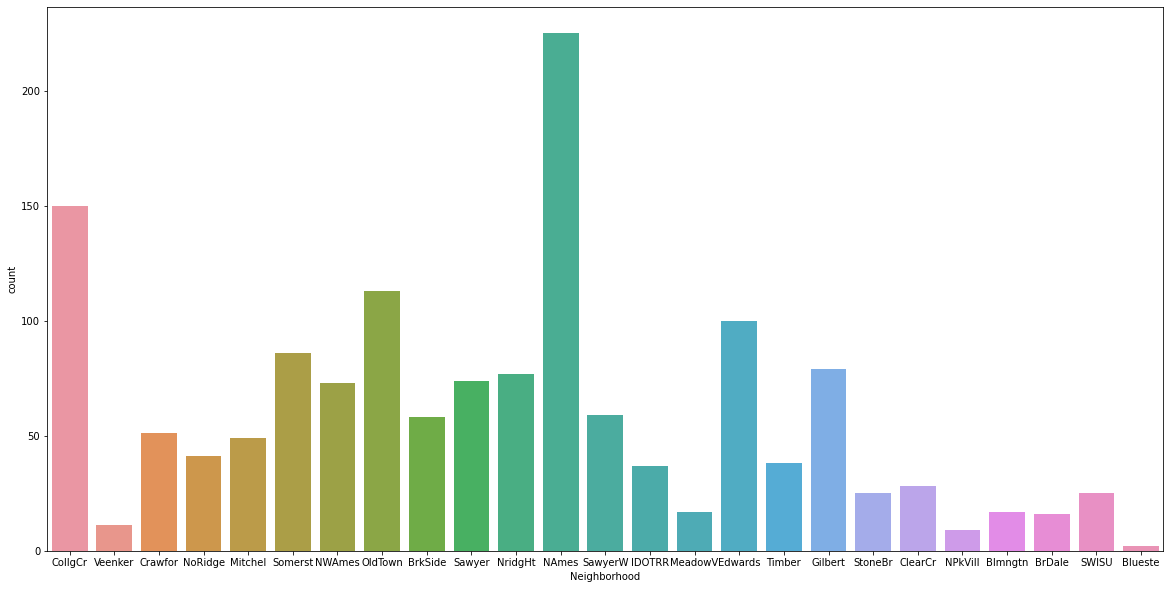

In [11]:
# bar (seaborn)
plt.figure(figsize=(20,10))
sns.countplot(x='Neighborhood',data=df)
plt.show()

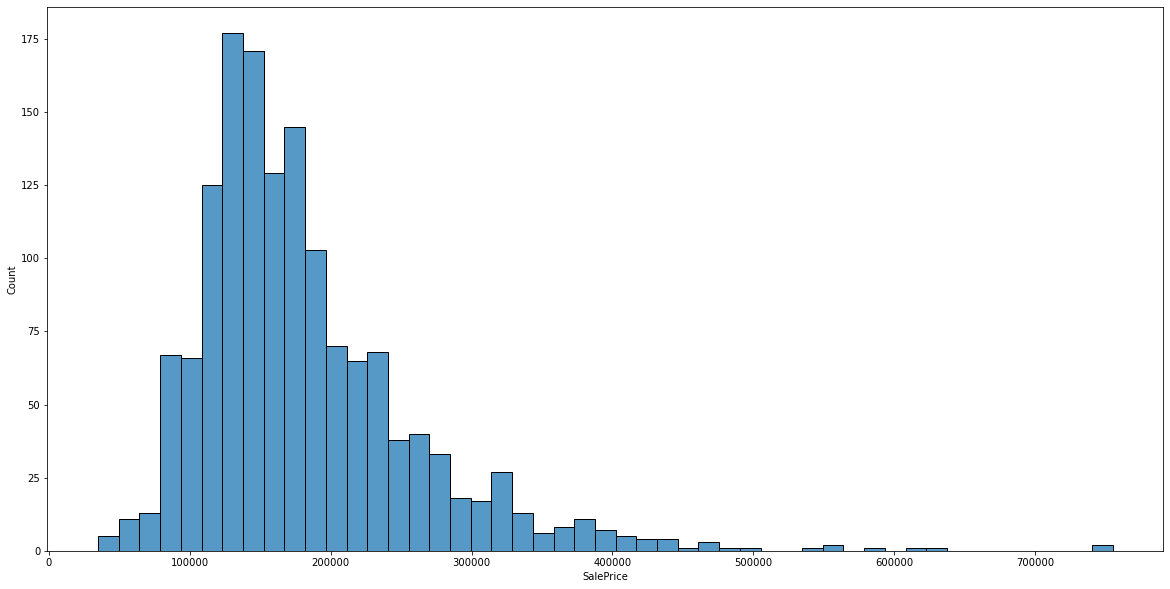

In [12]:
# hist (seaborn)
plt.figure(figsize=(20,10))
sns.histplot(x='SalePrice',data=df)
plt.show()

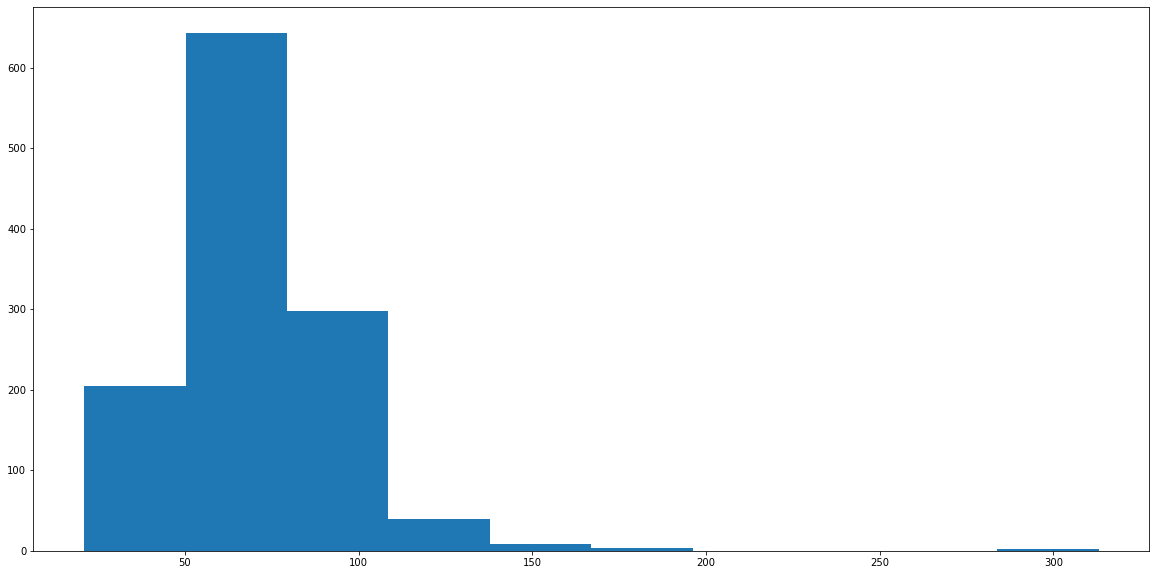

In [13]:
plt.figure(figsize=(20,10))
plt.hist(x='LotFrontage',data=df)
plt.show()

In [14]:
cat=df.dtypes[df.dtypes=='object'].index.to_list()
num=df.dtypes[df.dtypes!='object'].index.to_list()

In [15]:
# Importing print modification function..
from simple_colors import *
print (blue('hell'))
print (green('hell','bold'))
print (red('hell',['bold','underlined']))

hell
hell
hell


MSSubClass


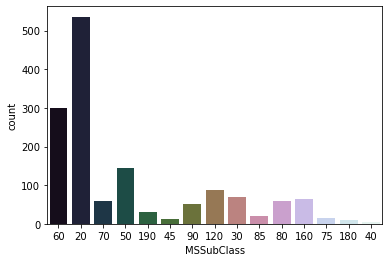

20 have the Highest Sale with 536
40 have the Lowest Sale with 4
---------------------------------------------------------------
MSZoning


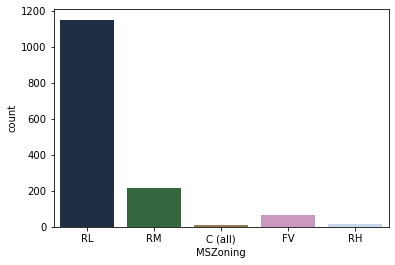

RL have the Highest Sale with 1151
C (all) have the Lowest Sale with 10
---------------------------------------------------------------
Street


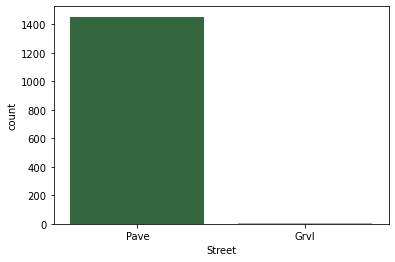

Pave have the Highest Sale with 1454
Grvl have the Lowest Sale with 6
---------------------------------------------------------------
Alley


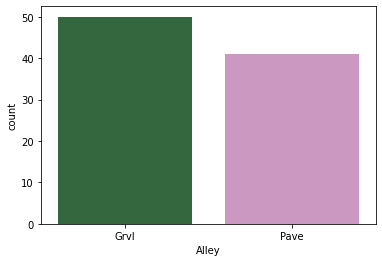

Grvl have the Highest Sale with 50
Pave have the Lowest Sale with 41
---------------------------------------------------------------
LotShape


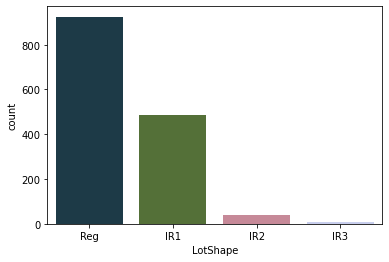

Reg have the Highest Sale with 925
IR3 have the Lowest Sale with 10
---------------------------------------------------------------
LandContour


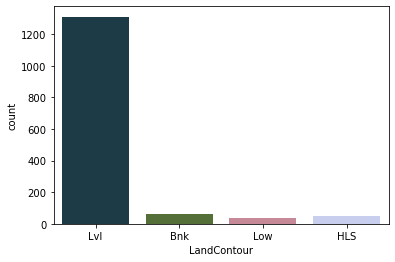

Lvl have the Highest Sale with 1311
Low have the Lowest Sale with 36
---------------------------------------------------------------
Utilities


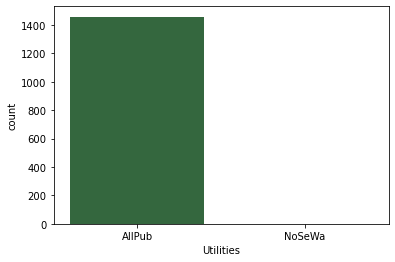

AllPub have the Highest Sale with 1459
NoSeWa have the Lowest Sale with 1
---------------------------------------------------------------
LotConfig


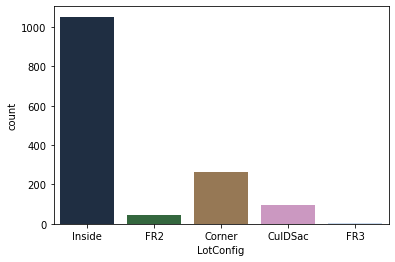

Inside have the Highest Sale with 1052
FR3 have the Lowest Sale with 4
---------------------------------------------------------------
LandSlope


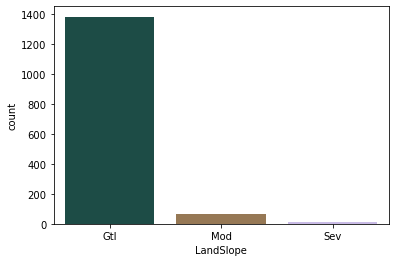

Gtl have the Highest Sale with 1382
Sev have the Lowest Sale with 13
---------------------------------------------------------------
Neighborhood


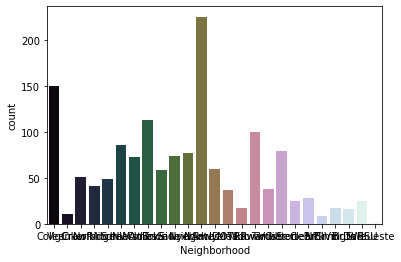

NAmes have the Highest Sale with 225
Blueste have the Lowest Sale with 2
---------------------------------------------------------------
Condition1


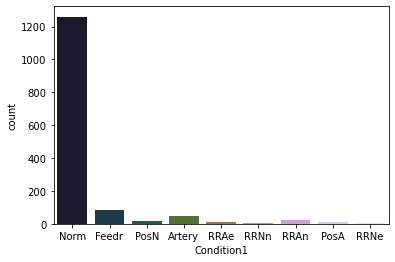

Norm have the Highest Sale with 1260
RRNe have the Lowest Sale with 2
---------------------------------------------------------------
Condition2


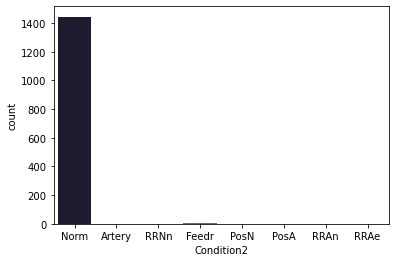

Norm have the Highest Sale with 1445
RRAe have the Lowest Sale with 1
---------------------------------------------------------------
BldgType


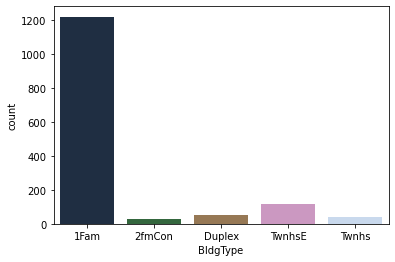

1Fam have the Highest Sale with 1220
2fmCon have the Lowest Sale with 31
---------------------------------------------------------------
HouseStyle


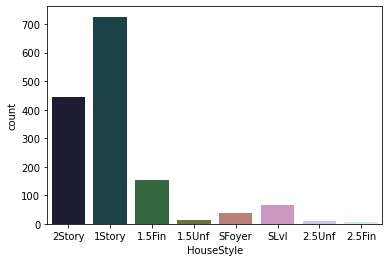

1Story have the Highest Sale with 726
2.5Fin have the Lowest Sale with 8
---------------------------------------------------------------
OverallQual


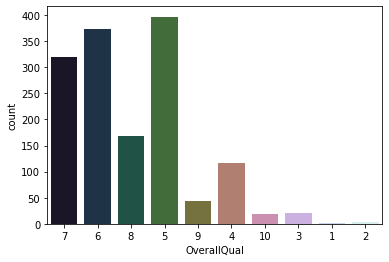

5 have the Highest Sale with 397
1 have the Lowest Sale with 2
---------------------------------------------------------------
OverallCond


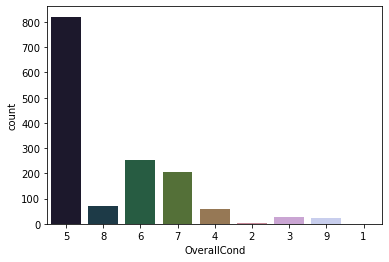

5 have the Highest Sale with 821
1 have the Lowest Sale with 1
---------------------------------------------------------------
RoofStyle


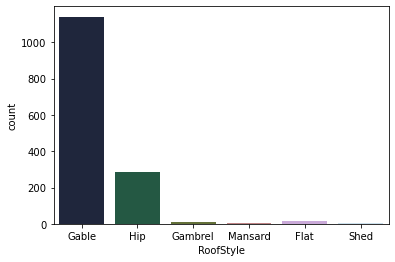

Gable have the Highest Sale with 1141
Shed have the Lowest Sale with 2
---------------------------------------------------------------
RoofMatl


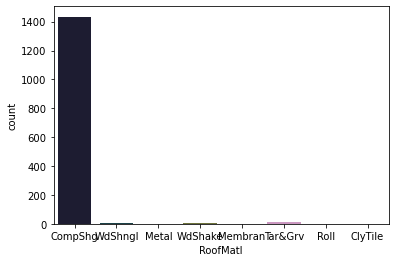

CompShg have the Highest Sale with 1434
ClyTile have the Lowest Sale with 1
---------------------------------------------------------------
Exterior1st


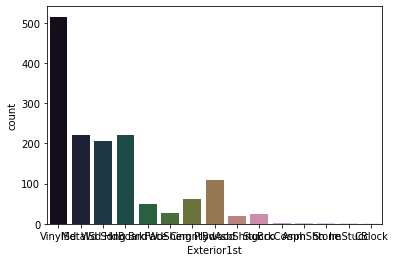

VinylSd have the Highest Sale with 515
CBlock have the Lowest Sale with 1
---------------------------------------------------------------
Exterior2nd


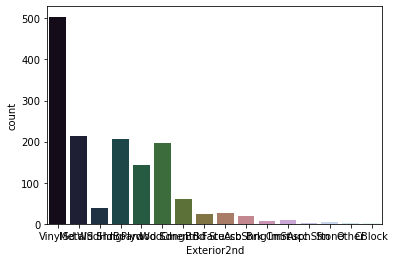

VinylSd have the Highest Sale with 504
CBlock have the Lowest Sale with 1
---------------------------------------------------------------
MasVnrType


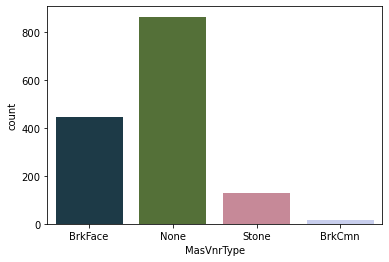

None have the Highest Sale with 864
BrkCmn have the Lowest Sale with 15
---------------------------------------------------------------
ExterQual


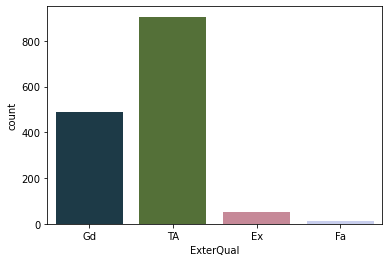

TA have the Highest Sale with 906
Fa have the Lowest Sale with 14
---------------------------------------------------------------
ExterCond


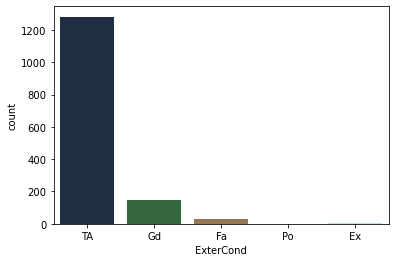

TA have the Highest Sale with 1282
Po have the Lowest Sale with 1
---------------------------------------------------------------
Foundation


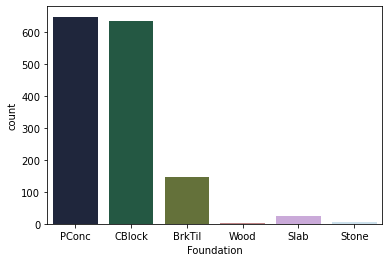

PConc have the Highest Sale with 647
Wood have the Lowest Sale with 3
---------------------------------------------------------------
BsmtQual


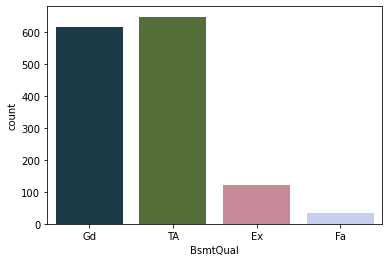

TA have the Highest Sale with 649
Fa have the Lowest Sale with 35
---------------------------------------------------------------
BsmtCond


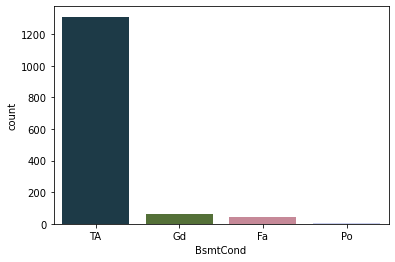

TA have the Highest Sale with 1311
Po have the Lowest Sale with 2
---------------------------------------------------------------
BsmtExposure


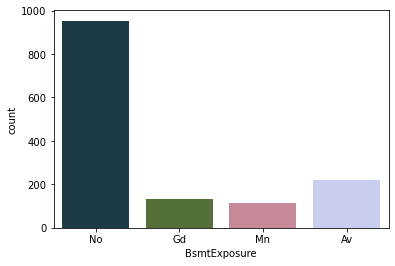

No have the Highest Sale with 953
Mn have the Lowest Sale with 114
---------------------------------------------------------------
BsmtFinType1


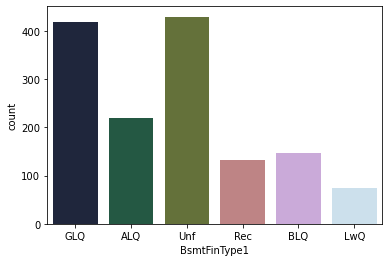

Unf have the Highest Sale with 430
LwQ have the Lowest Sale with 74
---------------------------------------------------------------
BsmtFinType2


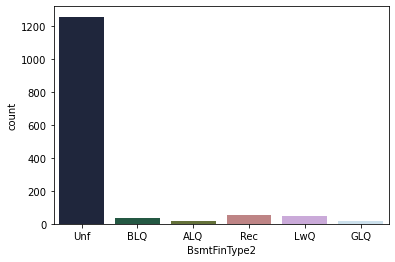

Unf have the Highest Sale with 1256
GLQ have the Lowest Sale with 14
---------------------------------------------------------------
Heating


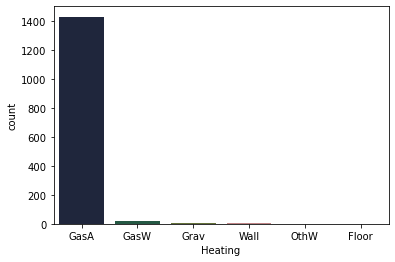

GasA have the Highest Sale with 1428
Floor have the Lowest Sale with 1
---------------------------------------------------------------
HeatingQC


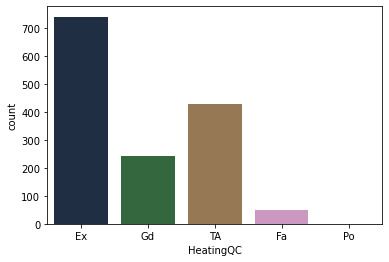

Ex have the Highest Sale with 741
Po have the Lowest Sale with 1
---------------------------------------------------------------
CentralAir


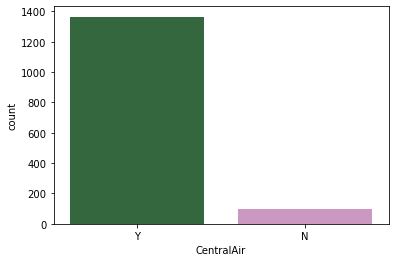

Y have the Highest Sale with 1365
N have the Lowest Sale with 95
---------------------------------------------------------------
Electrical


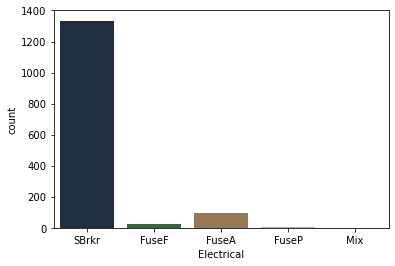

SBrkr have the Highest Sale with 1334
Mix have the Lowest Sale with 1
---------------------------------------------------------------
BsmtFullBath


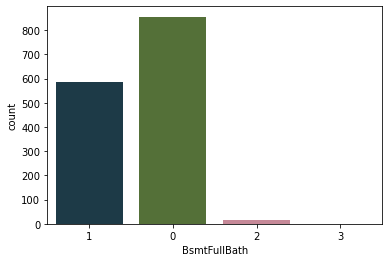

0 have the Highest Sale with 856
3 have the Lowest Sale with 1
---------------------------------------------------------------
BsmtHalfBath


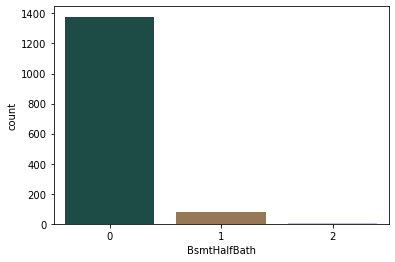

0 have the Highest Sale with 1378
2 have the Lowest Sale with 2
---------------------------------------------------------------
FullBath


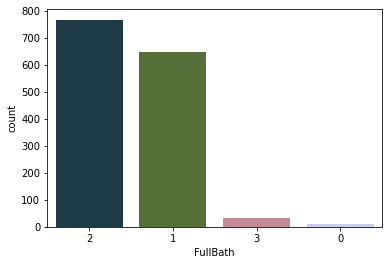

2 have the Highest Sale with 768
0 have the Lowest Sale with 9
---------------------------------------------------------------
HalfBath


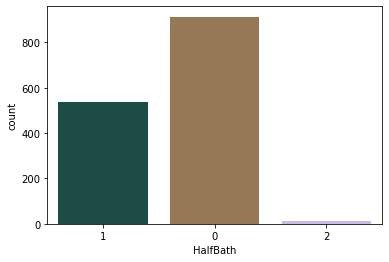

0 have the Highest Sale with 913
2 have the Lowest Sale with 12
---------------------------------------------------------------
BedroomAbvGr


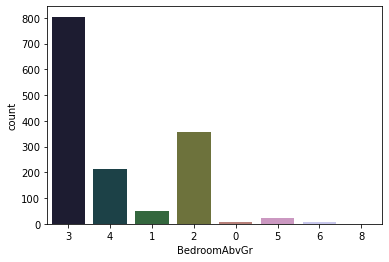

3 have the Highest Sale with 804
8 have the Lowest Sale with 1
---------------------------------------------------------------
KitchenAbvGr


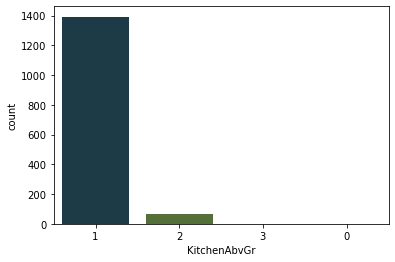

1 have the Highest Sale with 1392
0 have the Lowest Sale with 1
---------------------------------------------------------------
KitchenQual


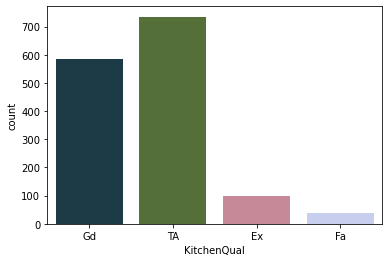

TA have the Highest Sale with 735
Fa have the Lowest Sale with 39
---------------------------------------------------------------
TotRmsAbvGrd


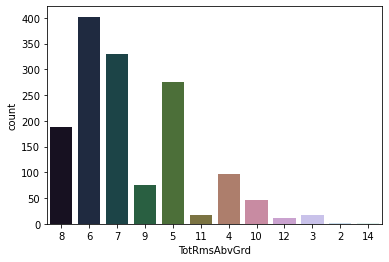

6 have the Highest Sale with 402
14 have the Lowest Sale with 1
---------------------------------------------------------------
Functional


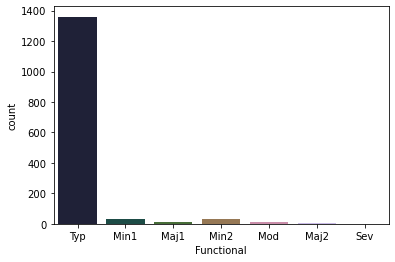

Typ have the Highest Sale with 1360
Sev have the Lowest Sale with 1
---------------------------------------------------------------
Fireplaces


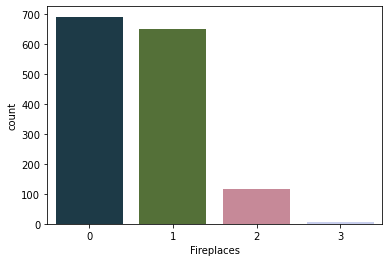

0 have the Highest Sale with 690
3 have the Lowest Sale with 5
---------------------------------------------------------------
FireplaceQu


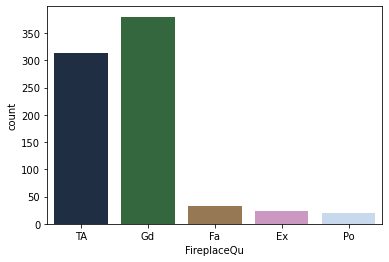

Gd have the Highest Sale with 380
Po have the Lowest Sale with 20
---------------------------------------------------------------
GarageType


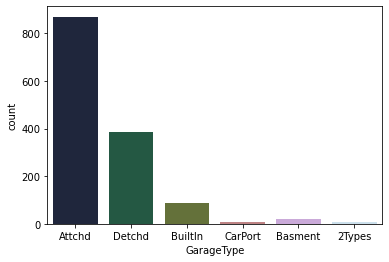

Attchd have the Highest Sale with 870
2Types have the Lowest Sale with 6
---------------------------------------------------------------
GarageFinish


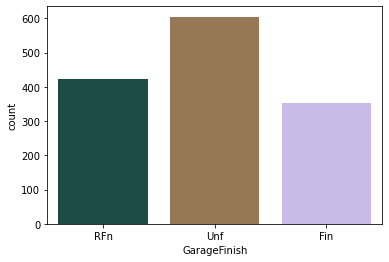

Unf have the Highest Sale with 605
Fin have the Lowest Sale with 352
---------------------------------------------------------------
GarageCars


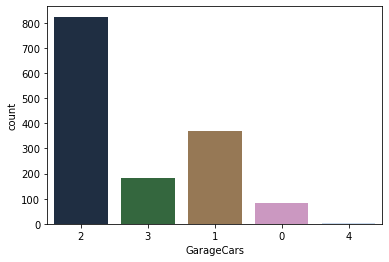

2 have the Highest Sale with 824
4 have the Lowest Sale with 5
---------------------------------------------------------------
GarageQual


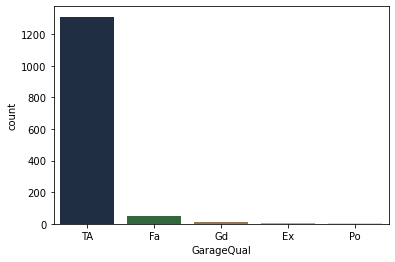

TA have the Highest Sale with 1311
Po have the Lowest Sale with 3
---------------------------------------------------------------
GarageCond


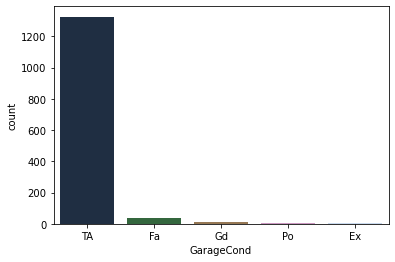

TA have the Highest Sale with 1326
Ex have the Lowest Sale with 2
---------------------------------------------------------------
PavedDrive


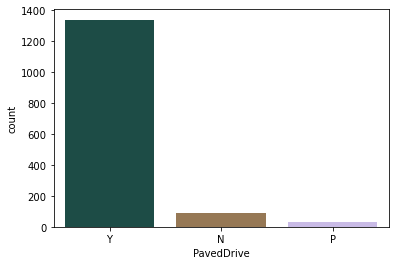

Y have the Highest Sale with 1340
P have the Lowest Sale with 30
---------------------------------------------------------------
PoolQC


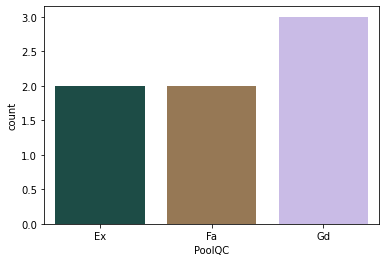

Gd have the Highest Sale with 3
Fa have the Lowest Sale with 2
---------------------------------------------------------------
Fence


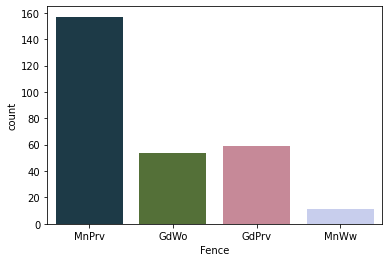

MnPrv have the Highest Sale with 157
MnWw have the Lowest Sale with 11
---------------------------------------------------------------
MiscFeature


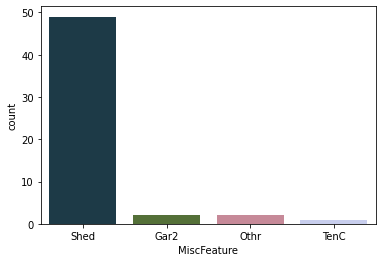

Shed have the Highest Sale with 49
TenC have the Lowest Sale with 1
---------------------------------------------------------------
SaleType


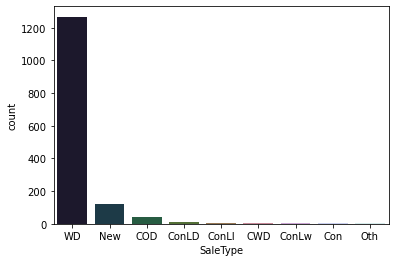

WD have the Highest Sale with 1267
Con have the Lowest Sale with 2
---------------------------------------------------------------
SaleCondition


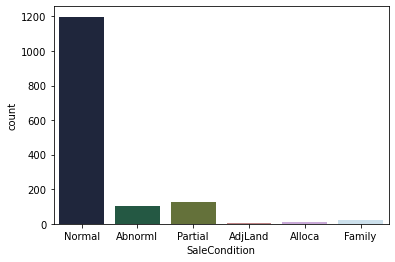

Normal have the Highest Sale with 1198
AdjLand have the Lowest Sale with 4
---------------------------------------------------------------


In [23]:
# Bar Plot showing category with their value_counts
for i in cat:
    # Bar plot
    sns.countplot(x=i,data=df,palette='cubehelix')
    
    #making a dataframe of their value counts 
    a=pd.DataFrame(df[i].value_counts())
    a.reset_index(inplace=True) #resetting index
    a.rename(columns={'index':'Category',i:'Counts'},inplace=True) #give column a new name
    print(black(i,'bold'))
    plt.show()
    
    #printing highest class and lowest class
    print(blue(a.iloc[0,0],'bold'),black("have the Highest Sale with",'bold'),red(a.iloc[0,1],'bold')) #
    print(blue(a.iloc[-1,0],'bold'),black("have the Lowest Sale with",'bold'),red(a.iloc[-1,1],'bold'))
    print(black('---------------------------------------------------------------',['bold']))

MSSubClass


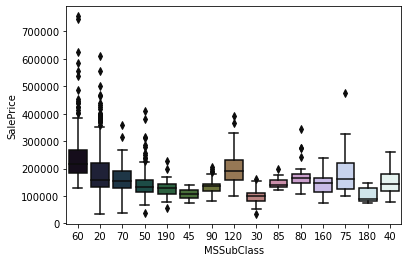

60 have the Highest avg sale price with 239948.5016722408
30 have the Lowest avg sale price with 95829.72463768115
----------------------------------------------------------------------------------------------
MSZoning


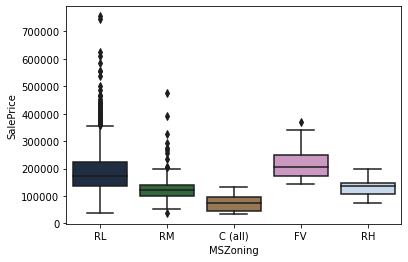

FV have the Highest avg sale price with 214014.06153846154
C (all) have the Lowest avg sale price with 74528.0
----------------------------------------------------------------------------------------------
Street


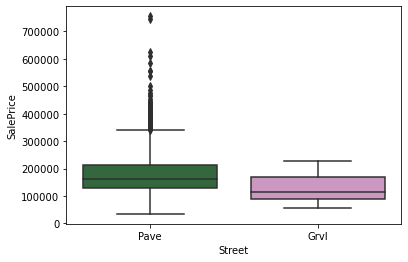

Pave have the Highest avg sale price with 181130.53851444292
Grvl have the Lowest avg sale price with 130190.5
----------------------------------------------------------------------------------------------
Alley


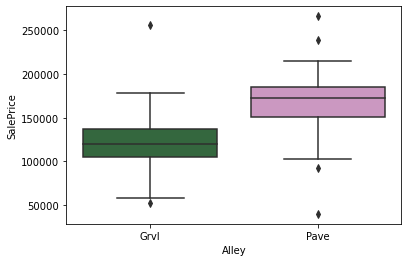

Pave have the Highest avg sale price with 168000.58536585365
Grvl have the Lowest avg sale price with 122219.08
----------------------------------------------------------------------------------------------
LotShape


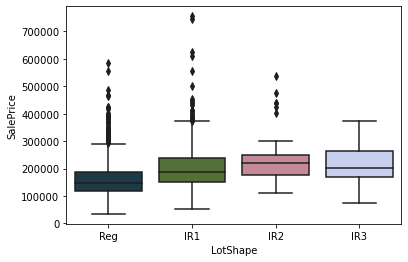

IR2 have the Highest avg sale price with 239833.36585365853
Reg have the Lowest avg sale price with 164754.81837837838
----------------------------------------------------------------------------------------------
LandContour


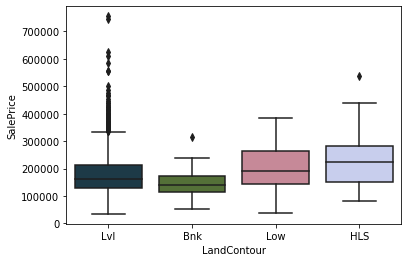

HLS have the Highest avg sale price with 231533.94
Bnk have the Lowest avg sale price with 143104.07936507938
----------------------------------------------------------------------------------------------
Utilities


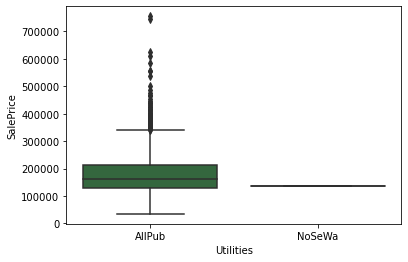

AllPub have the Highest avg sale price with 180950.95681973954
NoSeWa have the Lowest avg sale price with 137500.0
----------------------------------------------------------------------------------------------
LotConfig


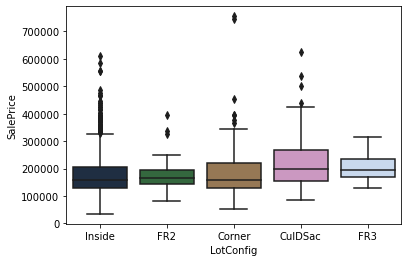

CulDSac have the Highest avg sale price with 223854.6170212766
Inside have the Lowest avg sale price with 176938.0475285171
----------------------------------------------------------------------------------------------
LandSlope


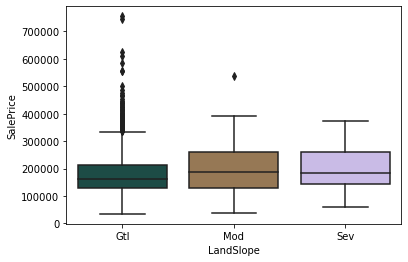

Sev have the Highest avg sale price with 204379.23076923078
Gtl have the Lowest avg sale price with 179956.7995658466
----------------------------------------------------------------------------------------------
Neighborhood


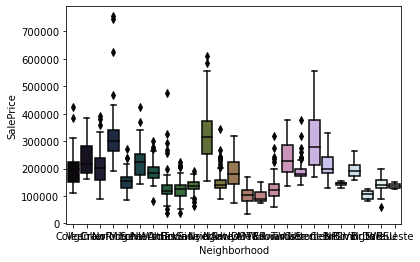

NoRidge have the Highest avg sale price with 335295.31707317074
MeadowV have the Lowest avg sale price with 98576.4705882353
----------------------------------------------------------------------------------------------
Condition1


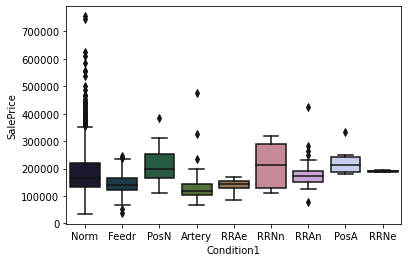

PosA have the Highest avg sale price with 225875.0
Artery have the Lowest avg sale price with 135091.66666666666
----------------------------------------------------------------------------------------------
Condition2


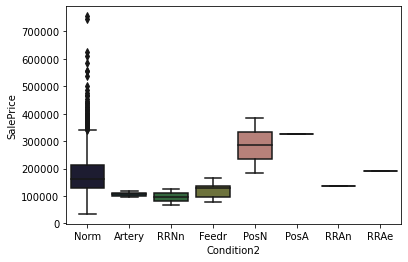

PosA have the Highest avg sale price with 325000.0
RRNn have the Lowest avg sale price with 96750.0
----------------------------------------------------------------------------------------------
BldgType


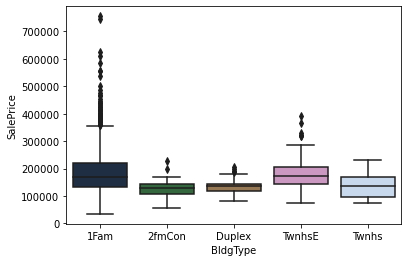

1Fam have the Highest avg sale price with 185763.80737704918
2fmCon have the Lowest avg sale price with 128432.25806451614
----------------------------------------------------------------------------------------------
HouseStyle


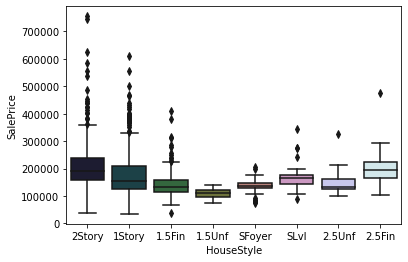

2.5Fin have the Highest avg sale price with 220000.0
1.5Unf have the Lowest avg sale price with 110150.0
----------------------------------------------------------------------------------------------
OverallQual


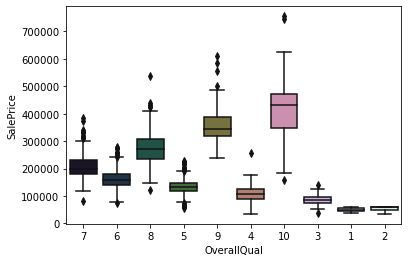

10 have the Highest avg sale price with 438588.3888888889
1 have the Lowest avg sale price with 50150.0
----------------------------------------------------------------------------------------------
OverallCond


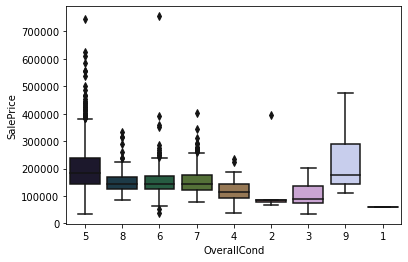

9 have the Highest avg sale price with 216004.54545454544
1 have the Lowest avg sale price with 61000.0
----------------------------------------------------------------------------------------------
RoofStyle


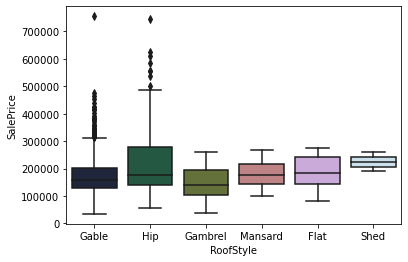

Shed have the Highest avg sale price with 225000.0
Gambrel have the Lowest avg sale price with 148909.0909090909
----------------------------------------------------------------------------------------------
RoofMatl


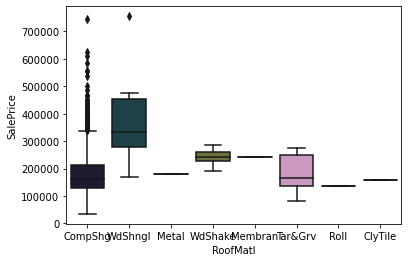

WdShngl have the Highest avg sale price with 390250.0
Roll have the Lowest avg sale price with 137000.0
----------------------------------------------------------------------------------------------
Exterior1st


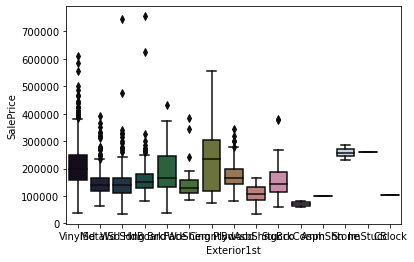

ImStucc have the Highest avg sale price with 262000.0
BrkComm have the Lowest avg sale price with 71000.0
----------------------------------------------------------------------------------------------
Exterior2nd


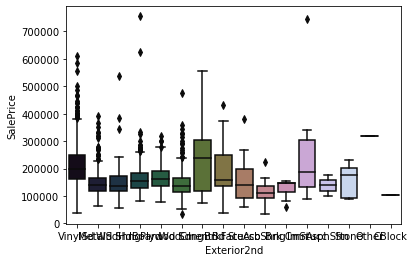

Other have the Highest avg sale price with 319000.0
CBlock have the Lowest avg sale price with 105000.0
----------------------------------------------------------------------------------------------
MasVnrType


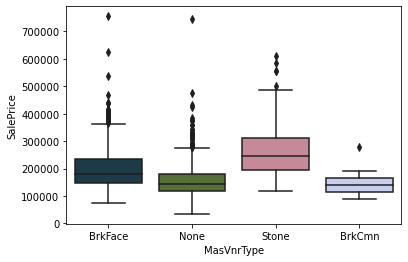

Stone have the Highest avg sale price with 265583.625
BrkCmn have the Lowest avg sale price with 146318.06666666668
----------------------------------------------------------------------------------------------
ExterQual


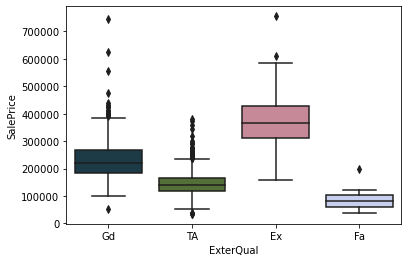

Ex have the Highest avg sale price with 367360.96153846156
Fa have the Lowest avg sale price with 87985.21428571429
----------------------------------------------------------------------------------------------
ExterCond


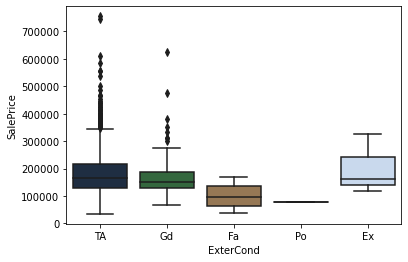

Ex have the Highest avg sale price with 201333.33333333334
Po have the Lowest avg sale price with 76500.0
----------------------------------------------------------------------------------------------
Foundation


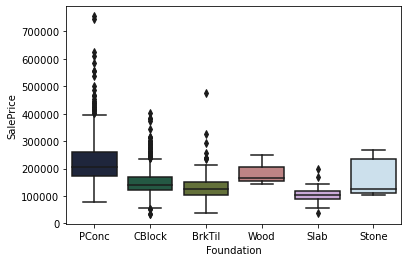

PConc have the Highest avg sale price with 225230.44204018547
Slab have the Lowest avg sale price with 107365.625
----------------------------------------------------------------------------------------------
BsmtQual


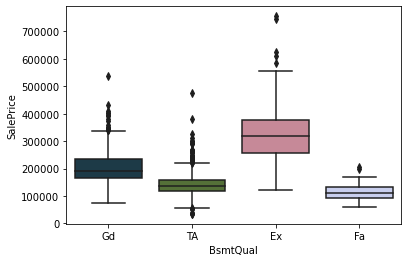

Ex have the Highest avg sale price with 327041.04132231406
Fa have the Lowest avg sale price with 115692.02857142857
----------------------------------------------------------------------------------------------
BsmtCond


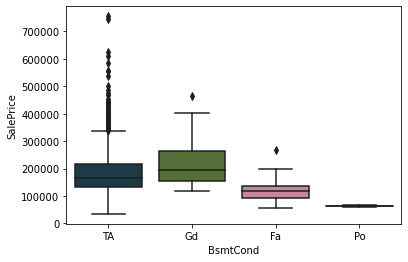

Gd have the Highest avg sale price with 213599.9076923077
Po have the Lowest avg sale price with 64000.0
----------------------------------------------------------------------------------------------
BsmtExposure


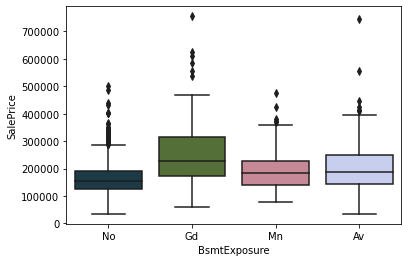

Gd have the Highest avg sale price with 257689.80597014926
No have the Lowest avg sale price with 165652.29590766
----------------------------------------------------------------------------------------------
BsmtFinType1


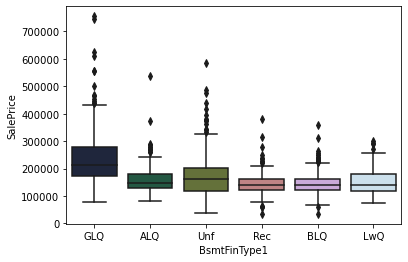

GLQ have the Highest avg sale price with 235413.72009569377
Rec have the Lowest avg sale price with 146889.24812030076
----------------------------------------------------------------------------------------------
BsmtFinType2


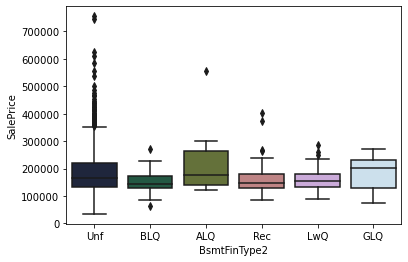

ALQ have the Highest avg sale price with 209942.1052631579
BLQ have the Lowest avg sale price with 151101.0
----------------------------------------------------------------------------------------------
Heating


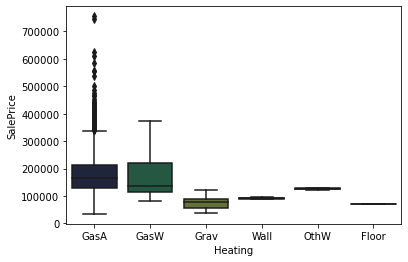

GasA have the Highest avg sale price with 182021.19537815126
Floor have the Lowest avg sale price with 72500.0
----------------------------------------------------------------------------------------------
HeatingQC


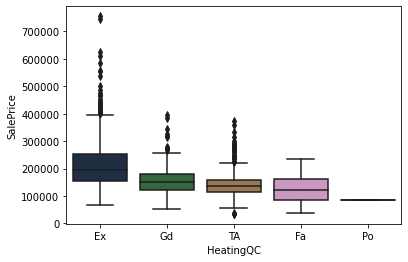

Ex have the Highest avg sale price with 214914.42914979756
Po have the Lowest avg sale price with 87000.0
----------------------------------------------------------------------------------------------
CentralAir


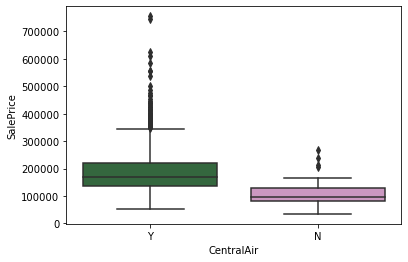

Y have the Highest avg sale price with 186186.7098901099
N have the Lowest avg sale price with 105264.07368421053
----------------------------------------------------------------------------------------------
Electrical


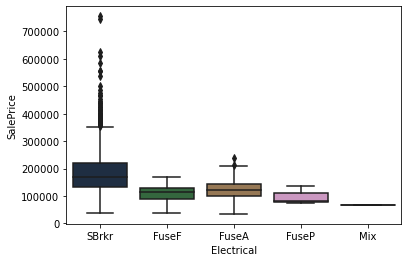

SBrkr have the Highest avg sale price with 186825.1131934033
Mix have the Lowest avg sale price with 67000.0
----------------------------------------------------------------------------------------------
BsmtFullBath


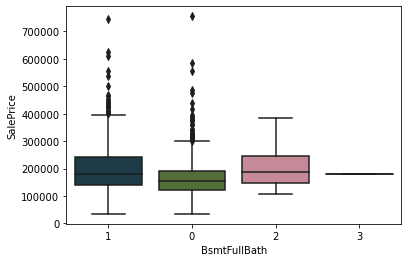

2 have the Highest avg sale price with 213063.06666666668
0 have the Lowest avg sale price with 165521.6401869159
----------------------------------------------------------------------------------------------
BsmtHalfBath


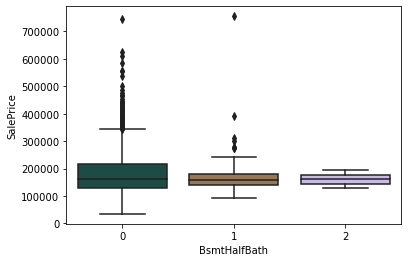

0 have the Highest avg sale price with 181230.33018867925
2 have the Lowest avg sale price with 160850.5
----------------------------------------------------------------------------------------------
FullBath


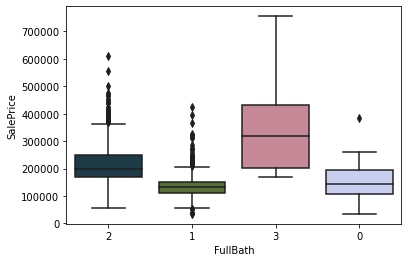

3 have the Highest avg sale price with 347822.9090909091
1 have the Lowest avg sale price with 134751.44
----------------------------------------------------------------------------------------------
HalfBath


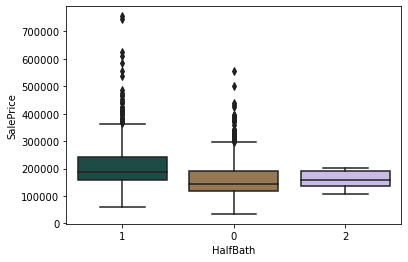

1 have the Highest avg sale price with 212721.96074766354
2 have the Lowest avg sale price with 162028.91666666666
----------------------------------------------------------------------------------------------
BedroomAbvGr


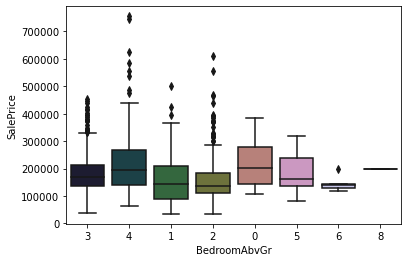

0 have the Highest avg sale price with 221493.16666666666
6 have the Lowest avg sale price with 143779.0
----------------------------------------------------------------------------------------------
KitchenAbvGr


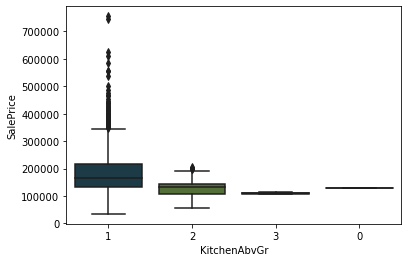

1 have the Highest avg sale price with 183388.79022988505
3 have the Lowest avg sale price with 109500.0
----------------------------------------------------------------------------------------------
KitchenQual


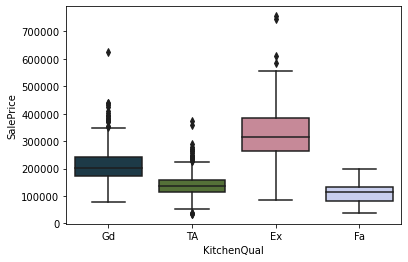

Ex have the Highest avg sale price with 328554.67
Fa have the Lowest avg sale price with 105565.20512820513
----------------------------------------------------------------------------------------------
TotRmsAbvGrd


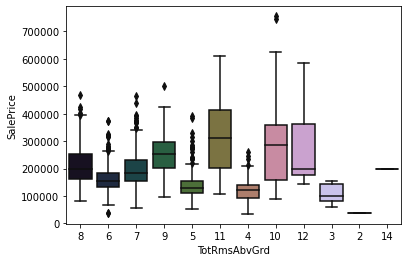

11 have the Highest avg sale price with 318022.0
2 have the Lowest avg sale price with 39300.0
----------------------------------------------------------------------------------------------
Functional


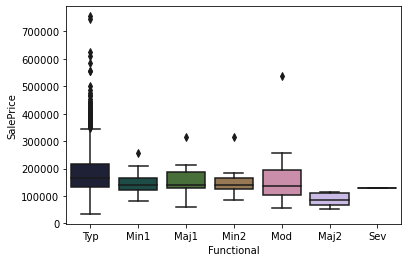

Typ have the Highest avg sale price with 183429.14705882352
Maj2 have the Lowest avg sale price with 85800.0
----------------------------------------------------------------------------------------------
Fireplaces


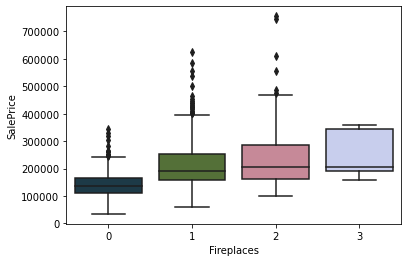

3 have the Highest avg sale price with 252000.0
0 have the Lowest avg sale price with 141331.48260869566
----------------------------------------------------------------------------------------------
FireplaceQu


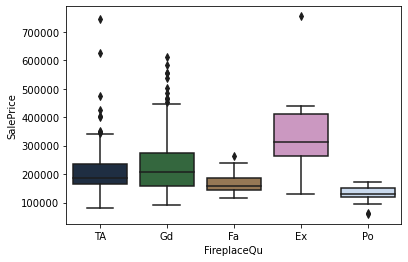

Ex have the Highest avg sale price with 337712.5
Po have the Lowest avg sale price with 129764.15
----------------------------------------------------------------------------------------------
GarageType


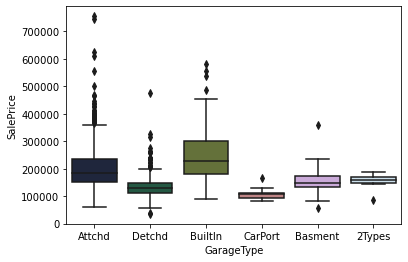

BuiltIn have the Highest avg sale price with 254751.73863636365
CarPort have the Lowest avg sale price with 109962.11111111111
----------------------------------------------------------------------------------------------
GarageFinish


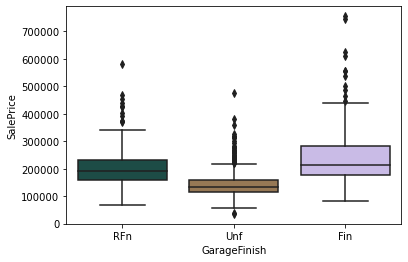

Fin have the Highest avg sale price with 240052.6903409091
Unf have the Lowest avg sale price with 142156.42314049587
----------------------------------------------------------------------------------------------
GarageCars


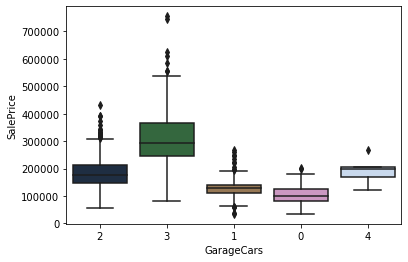

3 have the Highest avg sale price with 309636.1215469613
0 have the Lowest avg sale price with 103317.28395061729
----------------------------------------------------------------------------------------------
GarageQual


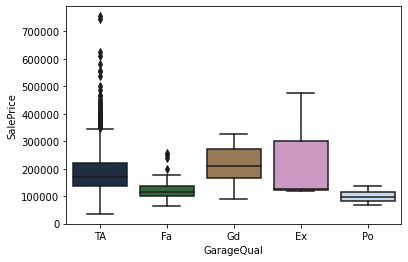

Ex have the Highest avg sale price with 241000.0
Po have the Lowest avg sale price with 100166.66666666667
----------------------------------------------------------------------------------------------
GarageCond


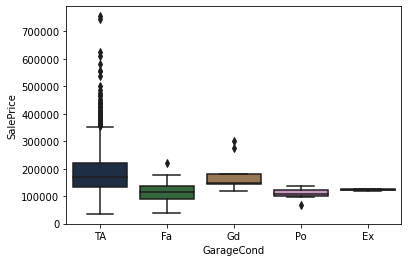

TA have the Highest avg sale price with 187885.73529411765
Po have the Lowest avg sale price with 108500.0
----------------------------------------------------------------------------------------------
PavedDrive


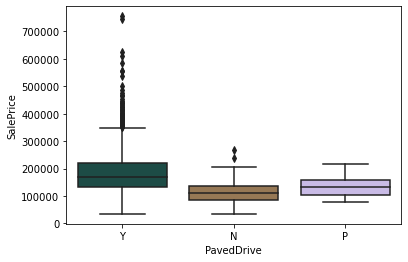

Y have the Highest avg sale price with 186433.973880597
N have the Lowest avg sale price with 115039.12222222223
----------------------------------------------------------------------------------------------
PoolQC


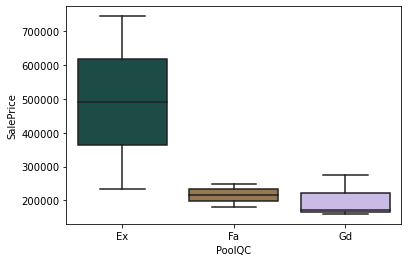

Ex have the Highest avg sale price with 490000.0
Gd have the Lowest avg sale price with 201990.0
----------------------------------------------------------------------------------------------
Fence


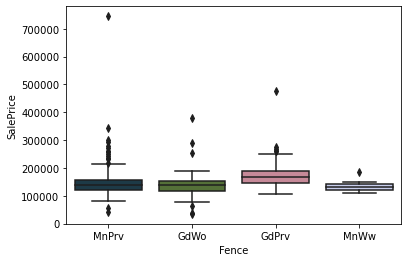

GdPrv have the Highest avg sale price with 178927.45762711865
MnWw have the Lowest avg sale price with 134286.36363636365
----------------------------------------------------------------------------------------------
MiscFeature


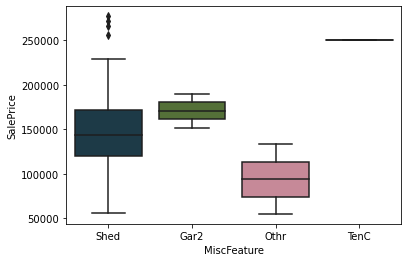

TenC have the Highest avg sale price with 250000.0
Othr have the Lowest avg sale price with 94000.0
----------------------------------------------------------------------------------------------
SaleType


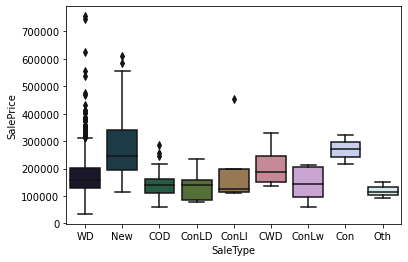

New have the Highest avg sale price with 274945.41803278687
Oth have the Lowest avg sale price with 119850.0
----------------------------------------------------------------------------------------------
SaleCondition


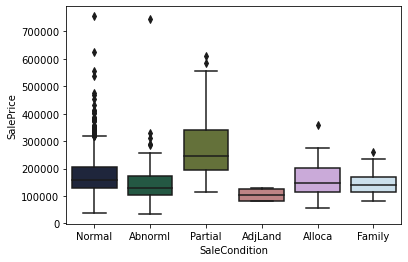

Partial have the Highest avg sale price with 272291.752
AdjLand have the Lowest avg sale price with 104125.0
----------------------------------------------------------------------------------------------


In [17]:
# Bar plot category with the spreadness of sale price
for i in cat:
    sns.boxplot(x=i,y='SalePrice',data=df,palette='cubehelix')
    
    # making a dataframe of avg sale price by categories
    a=df.groupby([i]).agg({'SalePrice':['mean']}) # Grouping avg sale by categorical column
    a.columns=a.columns.droplevel(1) # Dropping 1 level of column
    a.reset_index(inplace=True) # Resetting Index
    a=pd.DataFrame(a) 
    a=a.sort_values(by='SalePrice',ascending=False) # Sorting the values bu desc to aesc
    print(black(i,'bold'))
    plt.show()
    
    #printing highest and lowest avg sale price of categories
    print(blue(a.iloc[0,0],'bold'),black("have the Highest avg sale price with",'bold'),red(a.iloc[0,1],'bold'))
    print(blue(a.iloc[-1,0],'bold'),black("have the Lowest avg sale price with",'bold'),red(a.iloc[-1,1],'bold'))
    print(black('----------------------------------------------------------------------------------------------','bold'))

In [18]:
# Removing year dataype column from num list...
num.remove('GarageYrBlt')
num.remove('MoSold')
num.remove('YrSold')
num.remove('YearBuilt')
num.remove('YearRemodAdd')
black
red
green
yellow
blue
magenta
cyan

<function simple_colors.get_color_func.<locals>.fn(text, styles=None)>

In [19]:
# Function for printing correlation type...
def get_correlation_type(correlation):
    if correlation < -1 or correlation > 1:
        return yellow("Invalid correlation value",'bold')
    elif correlation == -1:
        return red("Perfect negative correlation",'bold')
    elif -1 < correlation < -0.7:
        return red("Strong negative correlation",'bold')
    elif -0.7 <= correlation < -0.3:
        return red("Moderate negative correlation",'bold')
    elif -0.3 <= correlation < 0:
        return red("Weak negative correlation",'bold')
    elif correlation == 0:
        return magenta("No correlation",'bold')
    elif 0 < correlation < 0.3:
        return green("Weak positive correlation",'bold')
    elif 0.3 <= correlation < 0.7:
        return green("Moderate positive correlation",'bold')
    elif 0.7 <= correlation < 1:
        return green("Strong positive correlation",'bold')
    elif correlation == 1:
        return green("Perfect positive correlation",'bold')

LotFrontage


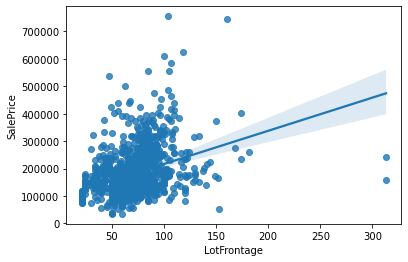

LotFrontage have Moderate positive correlation with SalePrice
----------------------------------------------------------------------------------------------
LotArea


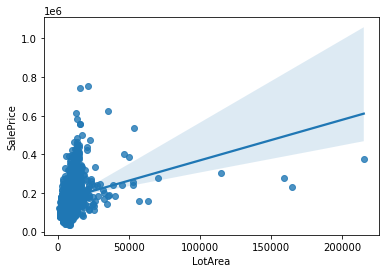

LotArea have Weak positive correlation with SalePrice
----------------------------------------------------------------------------------------------
MasVnrArea


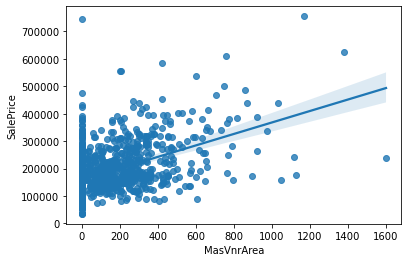

MasVnrArea have Moderate positive correlation with SalePrice
----------------------------------------------------------------------------------------------
BsmtFinSF1


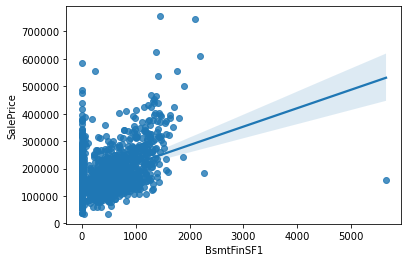

BsmtFinSF1 have Moderate positive correlation with SalePrice
----------------------------------------------------------------------------------------------
BsmtFinSF2


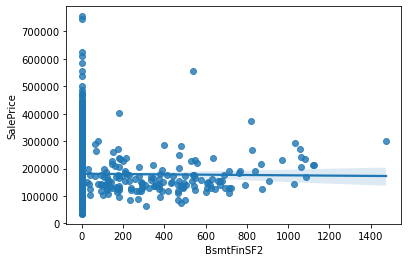

BsmtFinSF2 have Weak negative correlation with SalePrice
----------------------------------------------------------------------------------------------
BsmtUnfSF


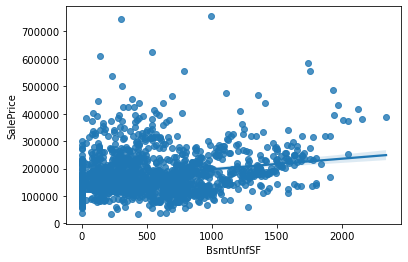

BsmtUnfSF have Weak positive correlation with SalePrice
----------------------------------------------------------------------------------------------
TotalBsmtSF


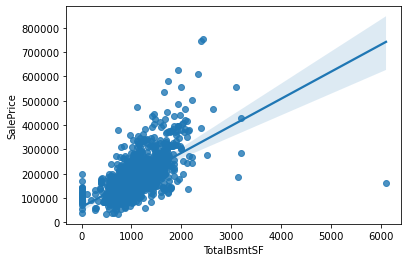

TotalBsmtSF have Moderate positive correlation with SalePrice
----------------------------------------------------------------------------------------------
1stFlrSF


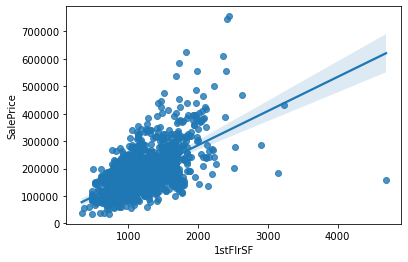

1stFlrSF have Moderate positive correlation with SalePrice
----------------------------------------------------------------------------------------------
2ndFlrSF


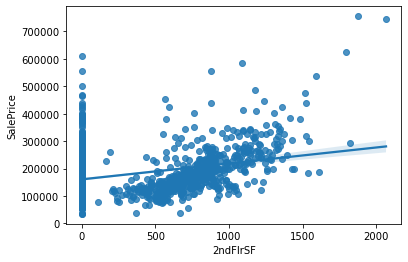

2ndFlrSF have Moderate positive correlation with SalePrice
----------------------------------------------------------------------------------------------
LowQualFinSF


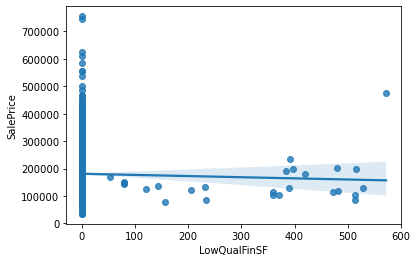

LowQualFinSF have Weak negative correlation with SalePrice
----------------------------------------------------------------------------------------------
GrLivArea


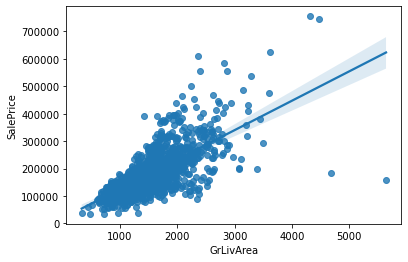

GrLivArea have Strong positive correlation with SalePrice
----------------------------------------------------------------------------------------------
GarageArea


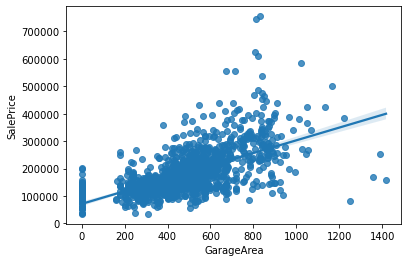

GarageArea have Moderate positive correlation with SalePrice
----------------------------------------------------------------------------------------------
WoodDeckSF


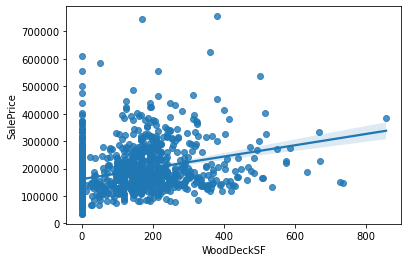

WoodDeckSF have Moderate positive correlation with SalePrice
----------------------------------------------------------------------------------------------
OpenPorchSF


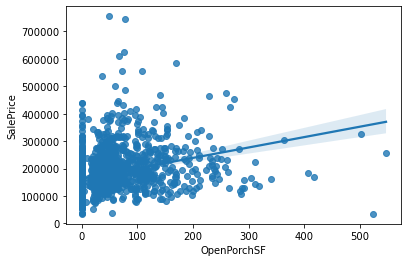

OpenPorchSF have Moderate positive correlation with SalePrice
----------------------------------------------------------------------------------------------
EnclosedPorch


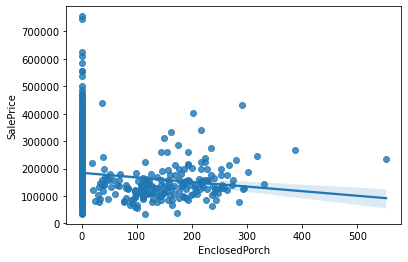

EnclosedPorch have Weak negative correlation with SalePrice
----------------------------------------------------------------------------------------------
3SsnPorch


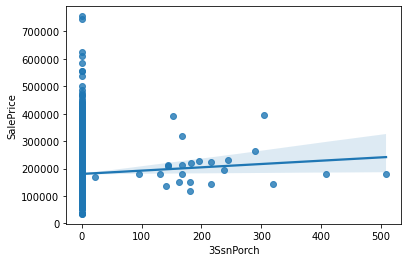

3SsnPorch have Weak positive correlation with SalePrice
----------------------------------------------------------------------------------------------
ScreenPorch


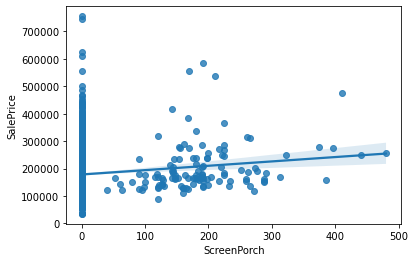

ScreenPorch have Weak positive correlation with SalePrice
----------------------------------------------------------------------------------------------
PoolArea


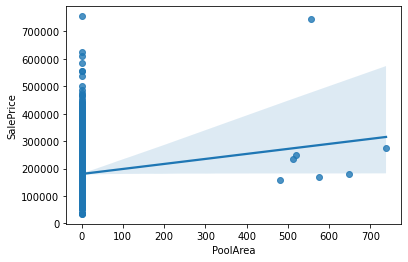

PoolArea have Weak positive correlation with SalePrice
----------------------------------------------------------------------------------------------
MiscVal


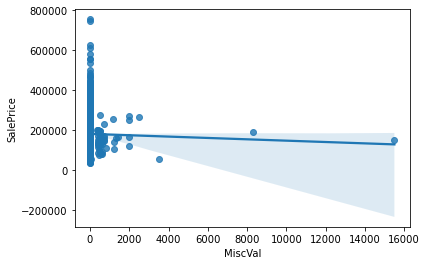

MiscVal have Weak negative correlation with SalePrice
----------------------------------------------------------------------------------------------
SalePrice


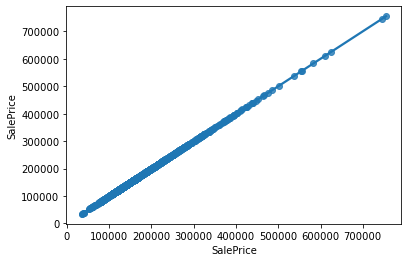

SalePrice have Perfect positive correlation with SalePrice
----------------------------------------------------------------------------------------------


In [21]:
# Reg plot to identify relationship between two Numerical variables
for i in num:
    sns.regplot(x=i,y='SalePrice',data=df)
    
    # Finding Correlation
    cor_coef=df[i].corr(df['SalePrice'])
    
    #printing column name
    print(magenta(i,('bright','bold')))
    
    plt.show()
    
    # printing type of corr by applying function 
    print(yellow(i,'bold'),black('have','bold'),get_correlation_type(cor_coef),black('with','bold'),red('SalePrice','bold'))
    print(black('----------------------------------------------------------------------------------------------','bold'))

YearBuilt


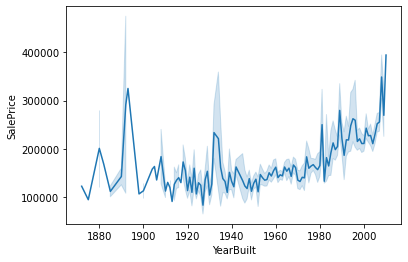

2010 is the YearBuilt with the Highest Avg sale is 394432.0
1927 is the YearBuilt with the Lowest Avg sale is 82666.66666666667
----------------------------------------------------------------------------------------------
YearRemodAdd


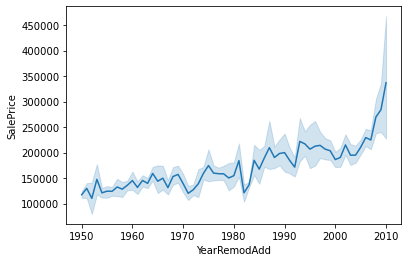

2010 is the YearRemodAdd with the Highest Avg sale is 336963.5
1952 is the YearRemodAdd with the Lowest Avg sale is 110398.6
----------------------------------------------------------------------------------------------


In [22]:
# Line plot to see how the avg sale price is changing with yearsbuilt and yearremodadd
dates=['YearBuilt','YearRemodAdd']
for i in dates:
    sns.lineplot(x=i,y='SalePrice',data=df)
    
    # Dataframe 
    a=pd.DataFrame(df.groupby([i]).agg({'SalePrice':'mean'}))
    a.reset_index(inplace=True)
    a=a.sort_values(by='SalePrice',ascending=False)
    
    
    print(black(i,'bold'))
    plt.show()
    
    #printing highest and lowest avg sale price of categories
    print(blue(a.iloc[0,0],'bold'),black("is the",'bold'),black(i,'bold'),black("with the Highest Avg sale is",'bold'),red(a.iloc[0,1],'bold'))
    print(blue(a.iloc[-1,0],'bold'),black("is the",'bold'),black(i,'bold'),black("with the Lowest Avg sale is",'bold'),red(a.iloc[-1,1],'bold'))
    print(black('----------------------------------------------------------------------------------------------','bold'))